[**Demo %s**](#demo-shooting-naive)

Let's first examine the shooting approach for the TPBVP from {numref}`Example {number} <example-tpbvp-mems>` with $\lambda=0.6$.

In [2]:
lambda = 0.6;
phi = @(r, w, dwdr) lambda ./ w.^2 - dwdr ./ r;

We convert the ODE to a first-order system in order to apply a numerical method. We also have to truncate the domain to avoid division by zero.

In [3]:
f = @(r, w) [ w(2); phi(r, w(1), w(2)) ];
a = eps;  b = 1;

The BVP specifies $w'(0)=y_2(0)=0$. We can try multiple values for the unknown $w(0)=y_1(0)$ and plot the solutions.

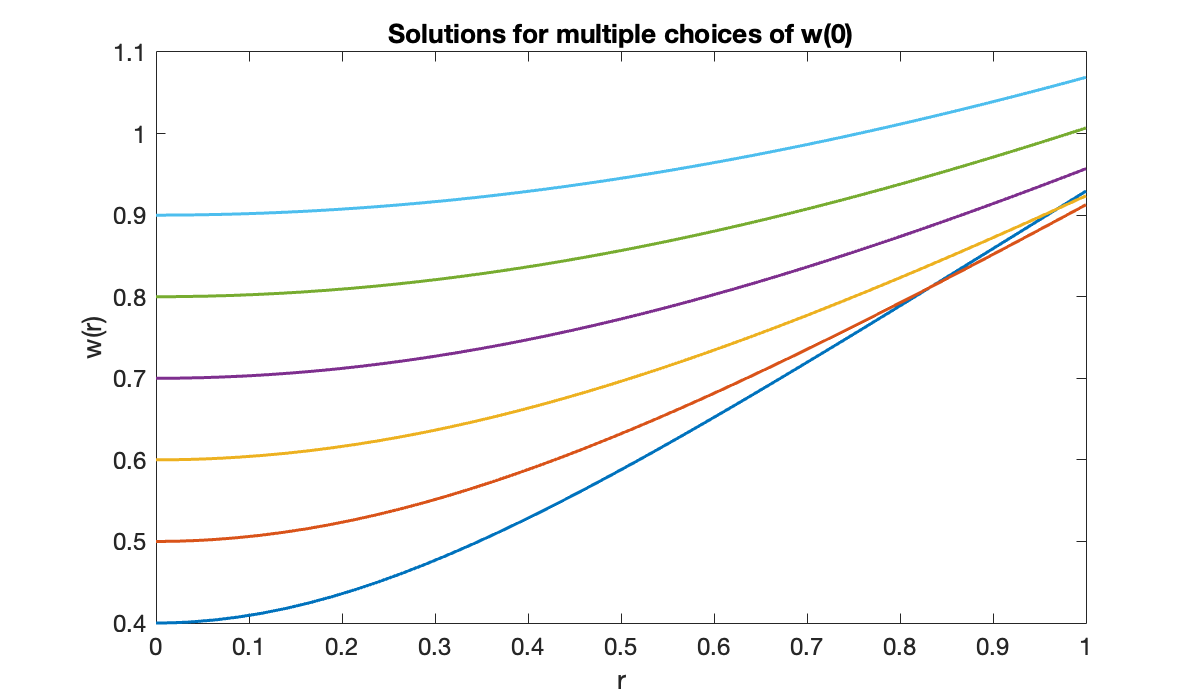

In [4]:
clf
ivp = ode;
ivp.ODEFcn = f;
ivp.InitialTime = a;
for w0 = 0.4:0.1:0.9
    ivp.InitialValue = [w0; 0];
    sol = solve(ivp, a, b);
    plot(sol.Time, sol.Solution(1, :))
    hold on
end
xlabel('r'),  ylabel('w(r)')
title('Solutions for multiple choices of w(0)')

On the graph, it's the curve starting at $w(0)=0.8$ that comes closest to the required condition $w(1)=1$, but it's a bit too large.